In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
hdb_transport = pd.read_csv('./hdb_ll_mrt_cp.csv',index_col=0)

In [3]:
hdb_transport.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,HERE_address,Latitude,Longitude,closest_mrt,dist_mrt_km,closest_cp,dist_cp_km
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4 Singapore,1.37541,103.8374,YIO CHU KANG MRT STATION SINGAPORE,1.0909,BLK 173/176 ANG MO KIO AVE 4,0.1152
1,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,69,275000.0,174 ANG MO KIO AVE 4 Singapore,1.37541,103.8374,YIO CHU KANG MRT STATION SINGAPORE,1.0909,BLK 173/176 ANG MO KIO AVE 4,0.1152
2,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,68,310000.0,174 ANG MO KIO AVE 4 Singapore,1.37541,103.8374,YIO CHU KANG MRT STATION SINGAPORE,1.0909,BLK 173/176 ANG MO KIO AVE 4,0.1152
3,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,68,253000.0,174 ANG MO KIO AVE 4 Singapore,1.37541,103.8374,YIO CHU KANG MRT STATION SINGAPORE,1.0909,BLK 173/176 ANG MO KIO AVE 4,0.1152
4,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,68,290000.0,174 ANG MO KIO AVE 4 Singapore,1.37541,103.8374,YIO CHU KANG MRT STATION SINGAPORE,1.0909,BLK 173/176 ANG MO KIO AVE 4,0.1152


In [4]:
#One hot encode categorical features
dummies = pd.get_dummies(hdb_transport[['storey_range','flat_model']])

In [5]:
#Remove the original categorical columns
hdb_transport.drop(['storey_range','flat_model'],axis=1,inplace=True)

In [6]:
#Concatenate the one-hot-encoded features
hdb_transport_dummies = pd.concat([hdb_transport,dummies],axis=1)

In [7]:
#Check the columns
hdb_transport_dummies.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price',
       'HERE_address', 'Latitude', 'Longitude', 'closest_mrt', 'dist_mrt_km',
       'closest_cp', 'dist_cp_km', 'storey_range_01 TO 03',
       'storey_range_04 TO 06', 'storey_range_07 TO 09',
       'storey_range_10 TO 12', 'storey_range_13 TO 15',
       'storey_range_16 TO 18', 'storey_range_19 TO 21',
       'storey_range_22 TO 24', 'storey_range_25 TO 27',
       'storey_range_28 TO 30', 'storey_range_31 TO 33',
       'storey_range_34 TO 36', 'storey_range_37 TO 39',
       'storey_range_40 TO 42', 'storey_range_43 TO 45',
       'storey_range_46 TO 48', 'storey_range_49 TO 51', 'flat_model_2-room',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat

In [8]:
#drop the repetitive columns
chosen_df = hdb_transport_dummies.drop(['town','block','street_name','lease_commence_date','flat_type','HERE_address',
                                        'closest_mrt', 'dist_mrt_km','closest_cp', 'dist_cp_km',],axis=1).copy()

## Modelling 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [10]:
#Split the data for train and test 
tree_train = chosen_df[~chosen_df['month'].str.contains('2018')].drop(['resale_price','month'],axis=1).copy()
y_train = chosen_df[~chosen_df['month'].str.contains('2018')]['resale_price'].copy()
tree_test = chosen_df[chosen_df['month'].str.contains('2018')].drop(['resale_price','month'],axis=1).copy()
y_test = chosen_df[chosen_df['month'].str.contains('2018')]['resale_price'].copy()

In [11]:
#Check the columns
tree_train.columns.to_list()

['floor_area_sqm',
 'remaining_lease',
 'Latitude',
 'Longitude',
 'storey_range_01 TO 03',
 'storey_range_04 TO 06',
 'storey_range_07 TO 09',
 'storey_range_10 TO 12',
 'storey_range_13 TO 15',
 'storey_range_16 TO 18',
 'storey_range_19 TO 21',
 'storey_range_22 TO 24',
 'storey_range_25 TO 27',
 'storey_range_28 TO 30',
 'storey_range_31 TO 33',
 'storey_range_34 TO 36',
 'storey_range_37 TO 39',
 'storey_range_40 TO 42',
 'storey_range_43 TO 45',
 'storey_range_46 TO 48',
 'storey_range_49 TO 51',
 'flat_model_2-room',
 'flat_model_Adjoined flat',
 'flat_model_Apartment',
 'flat_model_DBSS',
 'flat_model_Improved',
 'flat_model_Improved-Maisonette',
 'flat_model_Maisonette',
 'flat_model_Model A',
 'flat_model_Model A-Maisonette',
 'flat_model_Model A2',
 'flat_model_Multi Generation',
 'flat_model_New Generation',
 'flat_model_Premium Apartment',
 'flat_model_Premium Apartment Loft',
 'flat_model_Premium Maisonette',
 'flat_model_Simplified',
 'flat_model_Standard',
 'flat_model_

In [12]:
def model_scores_cv(estimator,X,y):
    """
    This function takes a model with the independent and target variables and returns a list of 
    the cross validated mean r2 score and standard deviation as well as the mean RMSE and standard deviation.
    """
    scores = cross_validate(estimator,X,y,n_jobs=-1,cv=10,scoring =['r2','neg_mean_squared_error'])
    
    mean_r2_score = round(scores['test_r2'].mean(),4)
    std_r2 = round(scores['test_r2'].std(),4)
    
    print("Mean r2 score: ", mean_r2_score, '±', std_r2)
    
    mean_rmse_score = round(np.sqrt(scores['test_neg_mean_squared_error']*(-1)).mean(),4)
    rmse_std = round(np.sqrt(scores['test_neg_mean_squared_error']*(-1)).std(),4)
    
    print("Mean RMSE score: ", mean_rmse_score, '±', rmse_std)
    
    return [mean_r2_score, std_r2, mean_rmse_score, rmse_std]

In [13]:
comparison_df = pd.DataFrame({'model_name':[],'train_r2_mean':[],'train_r2_std':[],'train_RMSE_mean':[],'train_RMSE_std':[]})
def add_model_train(name,results_list):
    """
    This function takes in a name and a list of scores for summary comparison (training set)
    """
    global comparison_df
    comparison_df = comparison_df.append(pd.Series(([name]+results_list),
                               index=['model_name','train_r2_mean','train_r2_std','train_RMSE_mean','train_RMSE_std']),
                     ignore_index=True)
    return comparison_df

In [14]:
def model_test_scores(model,X_trn,y_trn,X_tst,y_tst,cols):
    """
    This function takes a model, the train and test variables and targets as well as the variable column names,
    returning the dataframe of variables and their coefficients, the r2, RMSE and predicted values
    """
    final_model = model.fit(X_trn,y_trn)
    
    predictions = model.predict(X_tst)
    
    score = r2_score(y_tst,predictions)
    rmse = round(np.sqrt(mean_squared_error(y_tst,predictions)),2)
    
    #Print the results
    print('Test r2 score: ', score)
    print('Test Mean Squared Error: ', rmse)
    
    coef_summary = pd.DataFrame({'Features':cols,'coef':model.coef_,'abs coef':abs(model.coef_)})
    
    return coef_summary, score, rmse, predictions

In [15]:
comparison_test = pd.DataFrame({'model_name':[],'test_r2_mean':[],'test_RMSE_mean':[]})
def add_model_test(name,r2,RMSE):
    """
    This function takes in a name and a list of scores for summary comparison (test set)
    """
    global comparison_test
    comparison_test = comparison_test.append(pd.Series([name,r2,RMSE],
                               index=['model_name','test_r2_mean','test_RMSE_mean']),
                     ignore_index=True)
    return comparison_test

In [16]:
def pred_real_plots_res(y_true,y_pred,model_name):
    '''
    This function takes in the true target values, predicted target values and model name to plot 
    the predicted versus real target values as well as the distribution of residuals
    '''
    plt.figure(figsize = (12,6))
    
    plt.subplot(1,2,1)
    plt.scatter(x=y_true/1000,y=y_pred/1000,c='blue',alpha=0.3,edgecolors='k')
    plt.plot((min(np.append(y_true,y_pred))/1000,max(np.append(y_true,y_pred))/1000),
            ((min(np.append(y_true,y_pred))/1000,max(np.append(y_true,y_pred))/1000)),c='k')
    
    plt.xlim=plt.ylim
    plt.title('{} Model \nPredicted resale price against actual resale price'.format(model_name),fontsize=13)
    plt.xlabel('Actual Price (in thousands)',fontsize=13)
    plt.ylabel('Predicted Price (in thousands)',fontsize=13)
    
    plt.subplot(1,2,2)
    plt.hist((y_true-y_pred)/1000,bins=100,edgecolor='k',color='blue')
    
    plt.title('{} Model \nDistribution of Residuals'.format(model_name),fontsize=13)
    plt.xlabel('Residuals (in thousands)',fontsize=13)
    plt.ylabel('Count',fontsize=13)
    plt.grid()

## Random Forest (non-drop cols)

In [18]:
rfr_tree = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
#Run cross validation on training set
rfr_tree_scores = model_scores_cv(rfr_tree,tree_train,y_train)

Mean r2 score:  0.9493 ± 0.0175
Mean RMSE score:  30914.8224 ± 6397.4261


In [20]:
rfr_tree.fit(tree_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
#Retrieve predictions and scores
rfr_tree_predictions = rfr_tree.predict(tree_test)
rfr_tree_score = round(r2_score(y_test,rfr_tree_predictions),4)
rfr_tree_rmse = round(np.sqrt(mean_squared_error(y_test,rfr_tree_predictions)),2)

print('Test r2 score: ',rfr_tree_score)
print('Test RMSE: ',rfr_tree_rmse)

Test r2 score:  0.9514
Test RMSE:  34743.88


In [22]:
#Take a look at MAE
mean_absolute_error(y_test,rfr_tree_predictions)

25176.571402507154

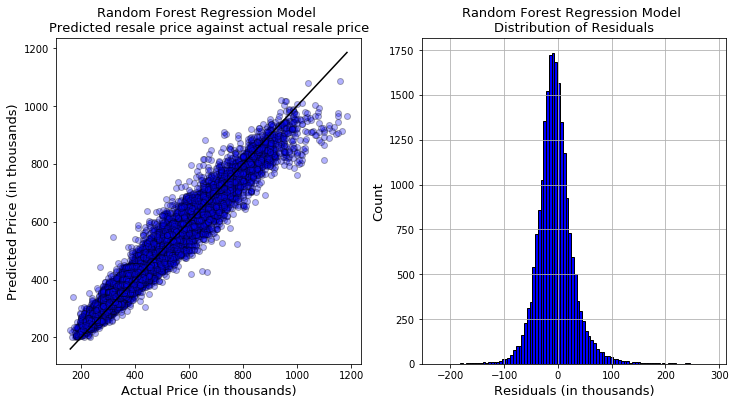

In [23]:
#Check predictions and residuals
pred_real_plots_res(y_test,rfr_tree_predictions,'Random Forest Regression')

In [24]:
#Take a look at the 10 most impactful features
rfr_tree_df = pd.DataFrame({'Features':tree_train.columns,'Importance':rfr_tree.feature_importances_})
rfr_tree_df.sort_values('Importance', ascending=False).head(10)

,Features,Importance
0,floor_area_sqm,0.506311
2,Latitude,0.248194
3,Longitude,0.110082
1,remaining_lease,0.058706
24,flat_model_DBSS,0.027171
32,flat_model_New Generation,0.012082
28,flat_model_Model A,0.010039
4,storey_range_01 TO 03,0.008436
5,storey_range_04 TO 06,0.003645
25,flat_model_Improved,0.002660


In [17]:
from rfpimp import *

In [104]:
#Take a look at the 10 most impactful features (permutated importance)
results = importances(rfr_tree, tree_test, y_test, n_samples=-1)
sorted_results_df = results.sort_values('Importance',ascending=False).head(10)
sorted_results_df

,Importance
Feature,
floor_area_sqm,1.072832
Latitude,0.737474
Longitude,0.299141
remaining_lease,0.177303
flat_model_DBSS,0.021960
storey_range_01 TO 03,0.017854
flat_model_Model A,0.013214
flat_model_New Generation,0.008775
storey_range_04 TO 06,0.006402


In [105]:
sorted_results_df=sorted_results_df.sort_values('Importance')

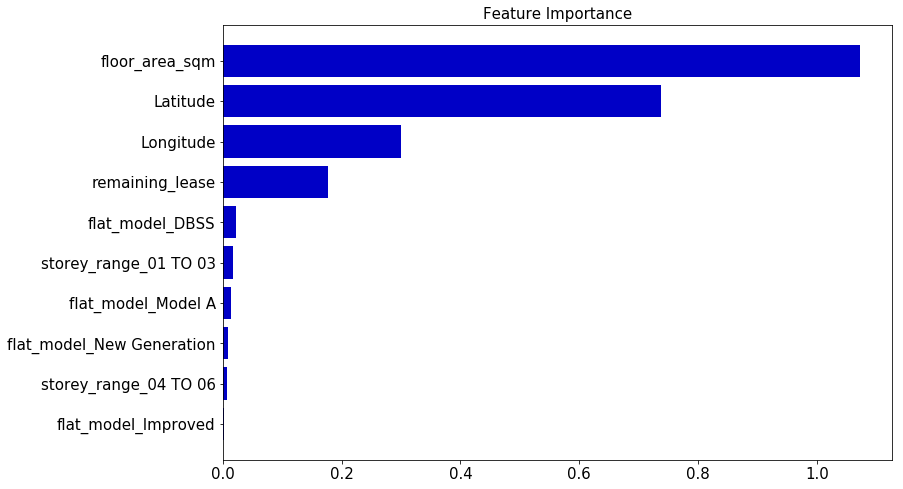

In [106]:
#Plot the 10 most impactful features
plt.figure(figsize=(12,8))
plt.barh(y=sorted_results_df.sort_values('Importance',ascending=True).index,width=sorted_results_df.sort_values('Importance',ascending=True)['Importance'],color='#0000c6')

plt.title("Feature Importance", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [26]:
#Add to the training scores table for comparison
add_model_train('Random Forest (all cols)',rfr_tree_scores)

,model_name,train_r2_mean,train_r2_std,train_RMSE_mean,train_RMSE_std
0,Random Forest (all cols),0.9493,0.0175,30914.8224,6397.4261


In [27]:
#Add results to the test scores table for comparison
add_model_test('Random Forest (all cols)',rfr_tree_score, rfr_tree_rmse)

,model_name,test_r2_mean,test_RMSE_mean
0,Random Forest (all cols),0.9514,34743.88


## XGBoost

In [29]:
xgr = XGBRegressor()

In [30]:
#Retrieve cross validated training scores
xgr_scores = model_scores_cv(xgr,tree_train,y_train)

Mean r2 score:  0.8819 ± 0.0218
Mean RMSE score:  47438.5377 ± 6417.2376


In [31]:
#Add to the training scores table for comparison
add_model_train('XGBoost (default)',xgr_scores)

,model_name,train_r2_mean,train_r2_std,train_RMSE_mean,train_RMSE_std
0,Random Forest (all cols),0.9493,0.0175,30914.8224,6397.4261
1,XGBoost (default),0.8819,0.0218,47438.5377,6417.2376


In [32]:
#Retrieve predictions and scores
xgr.fit(tree_train,y_train)
xgr_predictions = xgr.predict(tree_test)
xgr_score = round(r2_score(y_test,xgr_predictions),4)
xgr_rmse = round(np.sqrt(mean_squared_error(y_test,xgr_predictions)),2)

print('Test r2 score: ',xgr_score)
print('Test RMSE: ',xgr_rmse)

Test r2 score:  0.8807
Test RMSE:  54416.4


In [33]:
#Add results to the test scores table for comparison
add_model_test('XGBoost (default)',xgr_score, xgr_rmse)

,model_name,test_r2_mean,test_RMSE_mean
0,Random Forest (all cols),0.9514,34743.88
1,XGBoost (default),0.8807,54416.40


## Tuned XGBoost

In [34]:
#Create search hyperparameters
xgr_params ={
    "n_estimators":[100,150,200],
    'max_depth':[7,9,11,13,15,17,19,21],
    'learning_rate':[0.025,0.05,0.1,0.15],
    'n_jobs':[-1],
    'random_state':[42]
}

xgr_search = GridSearchCV(xgr,param_grid=xgr_params,cv=5,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error')

In [35]:
xgr_tune = xgr_search.fit(tree_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 62.1min finished


In [36]:
#Check the score
np.sqrt(xgr_tune.best_score_*-1)

30440.936597313703

In [37]:
#Check the tuned hyperparameters
xgr_tune.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
#Retrieve cross validated training scores
xgr_tune_scores = model_scores_cv(xgr_tune.best_estimator_,tree_train,y_train)

Mean r2 score:  0.9541 ± 0.0074
Mean RMSE score:  29582.0242 ± 3773.7337


In [39]:
#Add to the training scores table for comparison
add_model_train('Tuned XGB',xgr_tune_scores)

,model_name,train_r2_mean,train_r2_std,train_RMSE_mean,train_RMSE_std
0,Random Forest (all cols),0.9493,0.0175,30914.8224,6397.4261
1,XGBoost (default),0.8819,0.0218,47438.5377,6417.2376
2,Tuned XGB,0.9541,0.0074,29582.0242,3773.7337


In [54]:
def xgr_score(model,x_train,y_train,x_test,y_test): 
    '''
    This functions takes in a model, training varaibles and target, test variables and target
    and returns the r2 and RMSE scores
    '''
    model.fit(x_train,y_train)
    model_predictions = model.predict(x_test)
    model_score = round(r2_score(y_test,model_predictions),4)
    model_rmse = round(np.sqrt(mean_squared_error(y_test,model_predictions)),2)

    print('Test r2 score: ',model_score)
    print('Test RMSE: ', model_rmse)
    
    return model_score, model_rmse

In [55]:
tuned_xgb = xgr_tune.best_estimator_

In [56]:
#Retrieve test scores
xgr_tune_score, xgr_tune_rmse = xgr_score(tuned_xgb,tree_train,y_train,tree_test,y_test)

Test r2 score:  0.9522
Test RMSE:  34428.53


In [49]:
#Add results to the test scores table for comparison
add_model_test('Tuned XGB)',xgr_tune_score, xgr_tune_rmse)

,model_name,test_r2_mean,test_RMSE_mean
0,Random Forest (all cols),0.9514,34743.88
1,XGBoost (default),0.8807,54416.40
2,Tuned XGB),0.9522,34428.53


In [50]:
#Retrieve the predicted values
tuned_xgb.fit(tree_train,y_train)
xgr_tune_predictions = tuned_xgb.predict(tree_test)

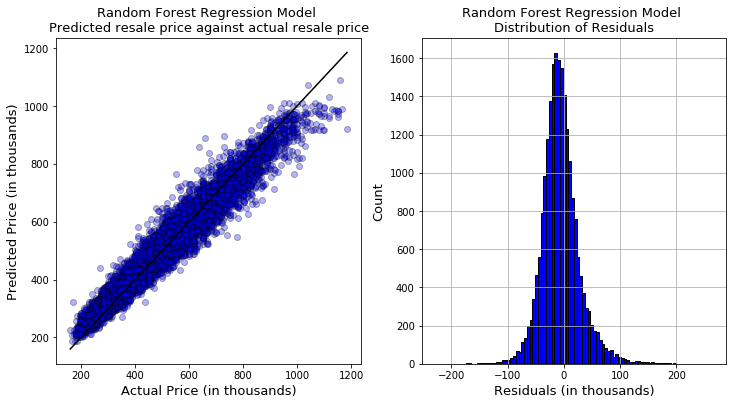

In [51]:
#Check predictions and residuals
pred_real_plots_res(y_test,xgr_tune_predictions,'Random Forest Regression')

In [52]:
#Record the feature importances in a DataFrame
tuned_xgb_df = pd.DataFrame({'Features':tree_train.columns,'Importance':tuned_xgb.feature_importances_})

In [53]:
#Take a look at the 10 most impactful features
tuned_xgb_top10 = tuned_xgb_df.sort_values('Importance', ascending=False).head(10)
tuned_xgb_top10

,Features,Importance
2,Latitude,0.236652
3,Longitude,0.220515
0,floor_area_sqm,0.220337
1,remaining_lease,0.157807
4,storey_range_01 TO 03,0.026578
5,storey_range_04 TO 06,0.020408
6,storey_range_07 TO 09,0.015365
7,storey_range_10 TO 12,0.014654
25,flat_model_Improved,0.009848
8,storey_range_13 TO 15,0.008721


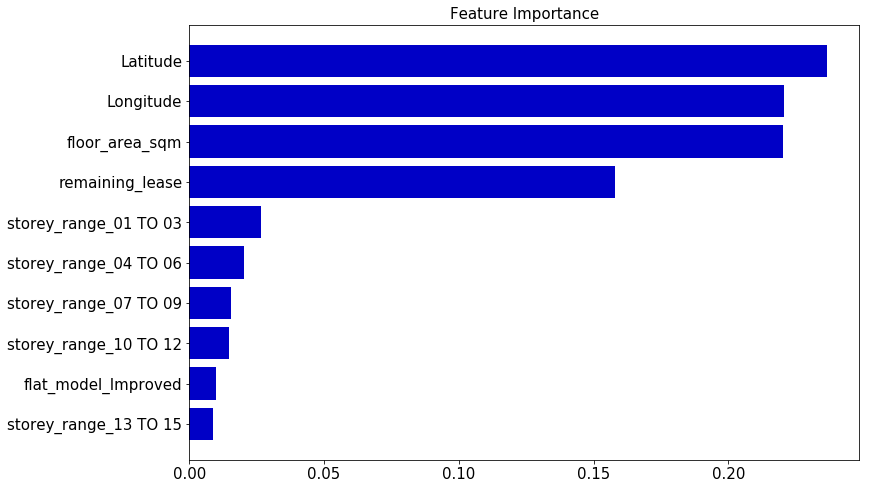

In [97]:
#Plot the 10 most impactful features
plt.figure(figsize=(12,8))
plt.barh(y=tuned_xgb_top10.sort_values('Importance',ascending=True)['Features'],width=tuned_xgb_top10.sort_values('Importance',ascending=True)['Importance'],color='#0000c6')

plt.title("Feature Importance", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yticks(ticks=np.arange(10),labels=['4th to 6th Floor', 'Schools', 'Supermarkets',
#                                     '1st to 3rd Floor','Distance from carpark',
#                                       'Distance from MRT','Longitude',
#                                       'Latitude','Remaining Lease','Floor Area'],fontsize=15)
plt.show()

In [113]:
#Get more statistics of the predictions
print('mean absolute error: ${:.2f}'.format(mean_absolute_error(y_test,xgr_tune_predictions)))
print('max error: ${:.2f}'.format(max(y_test-xgr_tune_predictions)))
print('max % error: {:.2f}'.format(max(abs(y_test-xgr_tune_predictions)/y_test)*100))
print('avg % error: {:.2f}'.format((sum((abs(y_test-xgr_tune_predictions)/y_test))/len(y_test)*100)))

mean absolute error: $25679.56
max error: $264042.75
max % error: 89.25
avg % error: 6.21


In [108]:
#Save the Tuned XGB Model
import pickle
filename = 'simple_XGB_model.pickle'
pickle.dump(tuned_xgb, open(filename, 'wb'))

<div class="alert alert-block alert-info">
    While the RMSE on the test set for this XGBoost model with minimal features is similar to the XGBoost model that took in all amenities but not flat longitude and latitude, the training cross validation shows that the XGBoost model with minimal features has lower variance and would generalise better. Location (as defined by latitude and longitude) is the most predictive feature for this model but location is a proxy to amenities that define value of the flat. As a result, this approach requires constant retraining, using a limited number of years as amenities may change rather significantly in upcoming HDB towns, which this model would not be able to differentiate between a similar location prior to and after the improvement of the amenities. If information about the amenties themselves could be included and recorded as of time of the sale, the XGBoost Model with amenities information but not the flat latitude and longitude would be able to make use of greater years of information (after prices are adjusted for inflation). This (minimalist) XGBoost model is better in the short term, but the XGBoost with amenities has the potential to score better by handling more data over longer periods.
</div>